<a href="https://colab.research.google.com/github/betsynew1/ET_Module_Testing_1/blob/main/TSP_PythonActivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# This first section is just for practice to show you what Python can do
# These are comments: they look green and are not part of the code, # just used to help document.
# Comments in Python are indicated with a hashtag "#".

# Feel free to change anything in this section: it will not affect anything below.

# Experiment and continue after this lab to keep learning about Python!
# https://www.learnpython.org/
# https://docs.python.org/3/ (Official Python documentation!)

# In this document, the symbol "# # #" is used to help you find sections of the code to change.
# In the name variable below, remove the name "Jasun" and type your name, leave the quotes!
# Hit the play button at the left and look at the bottom of this section to see the code output.
# Remove the # in front of the third print statement to make it active.
# Run the play button.  Lines have to be aligned

# # # # # # # # # #
name = "Joanna"
print("Hi " + name + ", Lets explore python and the Traveling Salesman Problem.")
print("Python does math: 3 + 5 =", 3+5)
# print("Make your own statement! " + "Commas seperate data types.")
# # # # # # # # # #

Hi Joanna, Lets explore python and the Traveling Salesman Problem.
Python does math: 3 + 5 = 8


# The Traveling Salesman Problem
Finding the shortest round-trip path between many locations.

---
You've seen the TSP in the intro slides and workbook activities, and you've even tried out some different paths using a Google spreadsheet. Here, we walk through a programmed solution of the problem--an *algorithm*.

The algorithm is as follows:
1. Generate all unique round-trip paths that can be taken across our cities.
2. Calculate the distances of all our generated paths.
3. Select the path with the shortest distance.

The algorithm may seem simple, but there are many parts to break down to describe this in code! We'll walk you through section by section, **function by function**, and show you how this is done.

Without further ado, let's begin!



## Section 0: Setting up the file and city locations

Before we start _anything_, we first need to grab our data from the Google spreadsheet and bring it into Python code.

1. In this Colab, click the folder icon on the lefthand slide. In the menu that opens up, right click in the space below the `sample_data` folder and select `New File`. Name your new file `cities.txt`.

2. Go back to your TSP Google spreadsheet and go to "Sheet 2". Copy all of the highlighted data there and paste it into `cities.txt` (double-click the `.txt` file to open it and paste). **Do not change any of the formatting!** Python will take care of that for you. :)

---
We are now set to continue.

The code below converts the data from the `cities.txt` file into a form Python can understand (in our case, a "dictionary"). More specifically:

  > Each city will come in the form `'cityName xCoord yCoord'`; we need to loop through each city and convert it to dictionary format, a data structure that lends itself handy in the other steps in this algorithm.

Curious about dictionaries and other data structures in Python? Read the
official Python documentation for more info! https://docs.python.org/3/tutorial/datastructures.html#dictionaries

Once you have read the code, press the "play" button at the top right of the block to run the code (you can use the triangular button, or click the block you'd like to run and press `Shift+Enter`).

**IMPORTANT!** For the code to run properly, the code blocks must be run **in order.** If you find yourself running into an error, try running every code block from the beginning (you can do this quickly by selecting the first code block and then pressing `Shift+Enter` repeatedly).

In [ ]:
# A special printing function we'll use to print out all the cities nicely!
# This line imports the "pprint" function from the "pprint" library.
from pprint import pprint

# Initialize our dictionary
allCities = dict()

# Keep track of the total number of cities
numCities = 0

with open('cities.txt') as cityFile:
  for line in cityFile:
    # Divide the 'cityName xCoord yCoord' string into a list of three strings.
    # We'll process the three chunks one by one.
    city = line.rsplit(maxsplit=2)

    # Grab the city name
    cityName = city[0]

    # Convert coordinates from strings (text) to floats (numbers with decimals)
    xCoord = float(city[1])
    yCoord = float(city[2])

    # Add the city to our dictionary
    allCities[cityName] = (xCoord, yCoord)
    numCities = numCities + 1

print("Here is the final dictionary of cities:")

# Use our special printing function to print the cities
pprint(allCities)

print("Number of cities:", numCities)

Here is the final dictionary of cities:
{'Atlanta': (15.0, 6.5),
 'Chicago': (13.0, 12.7),
 'Denver': (7.0, 10.5),
 'Houston': (10.6, 2.0),
 'LA': (1.5, 7.0),
 'Minneapolis': (11.0, 15.0),
 'NYC': (18.3, 13.5),
 'Seattle': (1.3, 18.2),
 'St. Louis': (12.3, 9.5)}
Number of cities: 9


## Section 1: Generate all unique possible paths
We will organize our code from here on out into **functions.** A *function* is simply a reusable piece of code, a routine that is defined *once* but can be called *many times*! This allows us to separate our code into reusable chunks, a technique known as *modularizing* our code.

Like in math, a function in code can have inputs and outputs. Outputs are indicated with the **`return`** keyword. Function definitions in Python are indicated with the **`def`** keyword.

Let's look at our first couple of functions below: the path-generation functions!

Before we find the shortest path, our algorithm first finds *all* the possible paths there are (this technique is known as *brute force*). Our main function in this section, `getUniquePaths`, does just that: given a collection of $n$ cities, it returns a collection of $\frac{(n-1)!}{2}$ unique paths.

Our other function, `isUnique`, is what's called a *helper function*--our `getUnique` function uses the `isUnique` subroutine to determine if a given path is unique (our first reusable piece of code!).

In [ ]:
# Import permutations function from built-in Python library
from itertools import permutations

def isUnique(path, pathSet):
  '''
  Helper function for `getUniquePaths`.

  Checks if a path is "unique" by checking if any shifted versions of the path
  are already in the `pathSet`.

  Returns `True` if path is unique, `False` if otherwise.

  Ex: For a path `('a', 'b', 'c')`, if `('b', 'c', 'a')` is in the `pathSet`,
    returns `False`--this is just a shifted version of an already-counted path!

  Parameters
  ----
  `path`: A tuple (ordered, unchangeable/immutable list) of strings (text) that
    represents an ordered sequence of cities. Takes the form
    `("cityA", "cityB", "cityC", ...,)`.
  `pathSet`: A collection (such as a set) of paths.
  '''

  pathLength = len(path)

  # Iterate through every shifted version of the path
  for offset in range(pathLength):
    shiftedPath = tuple(
        path[(offset + i) % pathLength] for i in range(pathLength)
    )

    # Check if the pathSet already has a shifted version
    if shiftedPath in pathSet:
      return False

  # If the code reaches this point, then we consider the path unique!
  return True

def getUniquePaths(allCities):
  '''
  Generates all unique sequences of cities given a `set` of cities.
  Discounts shifted and/or reversed versions of an already-generated path.

  Returns a `set` of unique paths.

  Parameters
  ----
  `allCities`: A `dict` (dictionary) of cities, where the keys are the city
    names and the values are their coordinates.

  Curious about the `set` data structure? Check the official Python
  documentation for more info!
  https://docs.python.org/3/library/stdtypes.html#set-types-set-frozenset
  '''
  allPaths = permutations(allCities)
  uniquePaths = set()

  # Check uniqueness for each path and its reverse
  for path in allPaths:
    if isUnique(path, uniquePaths) and isUnique(tuple(reversed(path)), uniquePaths):
      uniquePaths.add(path)

  return uniquePaths

We'll talk about this more toward the end, but the path-generation step in this algorithm is **the longest step in the process.** We'll formalize what it means to "take a long time" in Section 4, but keep this caveat in mind!

## Section 2: Distance functions

Let's look at our next couple of functions below: the distance functions!

Besides having to generate all possible paths, we need routines to calculate the distances of those paths. We have two functions: one that will calculate the total distance of a path (`getTotalDistance`) and one that calculates the distance just between two cities (`getDistance`). We use `getDistance` repeatedly as a helper function for `getTotalDistance`--another reusable piece of code! :)

One thing you may notice while reading this code is that programming and mathematics are intricately related. The distance function is a prime example of this--`getDistance` uses the distance formula in its implementation! Just think about it: how fascinating it is that we can get electrons to do our math for us....

In [ ]:
# Import Python's math library to use their square root function
import math

def getDistance(cityA, cityB):
  '''
  Helper function for `getTotalDistance'.

  Calculates the distance between any two cities using the Pythagorean Theorem.
  Uses scaling factors in the calculation to get distances that reflect cities'
  real geographical locations.

  Returns the distance between the cities as a `float` (number with decimal).

  Parameters
  ----
  `cityA`: `string` (text) -- The name of the first city.
  `cityB`: `string` (text) -- The name of the second city.
  '''
  # Grab the x- and y-coordinates for both cities using the city dictionary
  x1, y1 = allCities[cityA]
  x2, y2 = allCities[cityB]

  # Look familiar? It's the distance formula (with scaling factors)!
  dist = math.sqrt((80*(y2 - y1))**2 + (140*(x2 - x1))**2)

  return dist



def getTotalDistance(path):
  '''
  Calculates the *total round-trip distance* of a path in miles. Uses
  `getDistance` as a helper function to calculate distance between adjacent
  cities on a path.

  Parameters
  -----
  `path`: A `tuple` (ordered, unchangeable/immutable list) of strings (text) that
    represents an ordered sequence of cities. Takes the form
    `("cityA", "cityB", "cityC", ...,)`.
  '''
  # Initialize total distance
  totalDistance = 0

  # Loop through and tally up the distances between adjancent cities on the path
  for i in range(len(path) - 1):
    totalDistance = totalDistance + getDistance(path[i], path[i+1])

  # This is a round-trip distance: we need the distance between the last city
  # and the first!
  totalDistance = totalDistance + getDistance(path[-1], path[0])

  return totalDistance

## Section 3: Putting it all together!
We have all the functions we need to write our algorithm! With the above functions in mind, look again at the steps of our brute-force algorithm:
1. Generate all unique round-trip paths that can be taken across our cities.
2. Calculate the distances of all our generated paths.
3. Select the path with the shortest distance.
We can accomplish Step 1 with our path-generation functions, and we can accomplish Step 2 with our distance functions. All we have left to do is combine the results with a little more programming logic to accomplish Step 3!

Hopefully, this walkthrough is exposing to you how computers (and programmers) think about complex problems. They first break them down into smaller chunks, solve the chunks, and then put them together to solve the bigger problem. You, too, can start practicing this process! You, too, can be a computer programmer--with some time and effort, you'll be able to write even *better* solutions than this to even greater problems. :)

Without further ado, let's finish this algorithm!

In [ ]:
# We want to track the time it takes for this algorithm to run--
# we'll need a function from Python's time library
import time

# Record the start time of the algorithm
startTime = time.time()


# Step 1: Generate all possible paths! This is the longest step in the process.
uniquePaths = getUniquePaths(allCities)
print("Number of unique paths:", len(uniquePaths))
print("Step 1 Run Time:", round(time.time() - startTime, 3), "seconds")

# Steps 2 and 3: Calculate path distances and select the shortest path

# Intialize an empty *list* of path distances (used for plotting)
allPathDistances = []

# Initialize the minimum distance to infinity
shortestPath = None
minDistance = float('inf')

for path in uniquePaths:
  pathDistance = getTotalDistance(path)
  if pathDistance < minDistance:
    minDistance = pathDistance
    shortestPath = path

  allPathDistances.append(pathDistance)

# All done! We've determined the shortest path.
# Now, we print and plot our results.

print('Total Algorithm Run Time:', round(time.time() - startTime, 3), 'seconds')
print("Shortest Path Distance:", round(minDistance, 3), "miles")

# # # # # # # # # #
# This is the shortest path below: uncomment to see the answer!
print("Shortest Round-Trip Path:", shortestPath)

Number of unique paths: 20160
Step 1 Run Time: 4.637 seconds
Total Algorithm Run Time: 4.731 seconds
Shortest Path Distance: 6804.599 miles
Shortest Round-Trip Path: ('Seattle', 'LA', 'Houston', 'St. Louis', 'Atlanta', 'NYC', 'Chicago', 'Minneapolis', 'Denver')


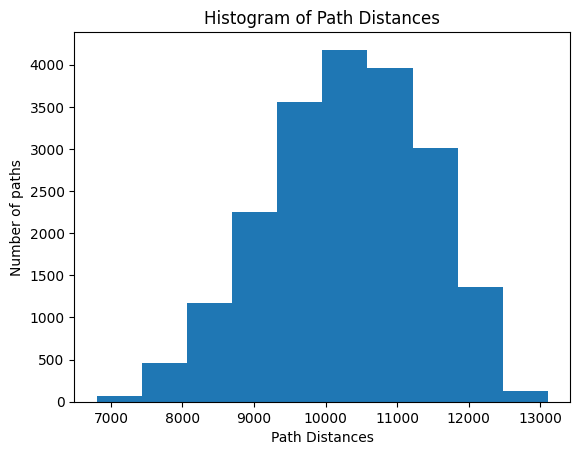

In [ ]:
# Plot a histogram of path distances
from matplotlib import pyplot as plt

# # # # # # # # # #
# Vary the number of bins in the histogram to see how the plot changes.
# What happens as you increase the number of bins to 20 or more?
# Does the shape of the curve look familiar?
plt.hist(allPathDistances, bins = 10)
plt.xlabel("Path Distances")
plt.ylabel("Number of paths")
plt.title("Histogram of Path Distances")
plt.show()

## Section 4: How well does our algorithm scale?

It's important that we programmers and mathematics analyze the *performance* of our algorithm. It helps quantify if our algorithm is correct, if it's efficient, and how well it can scale to larger inputs (e.g., 10 cities vs 10,000 cities).

How much time does our algorithm take? The exact answer depends on your particular computer (or, generally speaking, *machine*). Different processors take different amounts of time to perform the most primitive operations, such as adding two numbers together.

To generalize the notion of "slowness", computer scientists and mathematicians came up with a language to describe *time complexity*, known as **big-O notation.** Roughly speaking, the notation describes how the time an algorithm takes to run scales with the size of the input.

For example, if I have an algorithm that, given a size-$n$ input, takes $n$ steps to run, my algorithm would have an $O(n)$ runtime (pronounced "oh-of-n"). If it took a multiple of $n^2$ steps to run, the runtime would be $O(n^2)$.

Let's think about our algorithm: we said that our longest step in the process was the path-generation step. For an input of $n$ cities, our program has to generate and carefully check a collection of $n!$ permutations of those cities to get a result of $\frac{(n-1)!}{2}$ unique paths. That's a lot of paths! We would say that **our algorithm has an $O(n!)$ runtime.** In other words, **that's really bad.**

Here's a chart that shows a comparison of different time complexities of algorithms--$O(n!)$ is all the way to the left, in the darkest hue of red (it's the worst time complexity listed!).

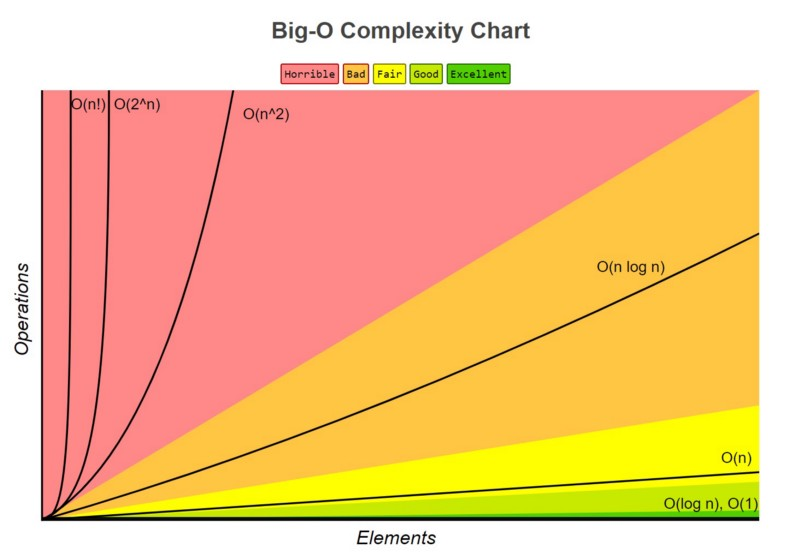

(Taken from [Big-O Cheat Sheet](https://www.bigocheatsheet.com/))

Let's demonstrate the scalability of our algorithm by experimenting the path-generation step.

----
With the Google spreadsheet fully filled out, we have $9$ cities to process. Generating a list of unique paths for $9$ cities took about $7$ seconds.

How much time would it take to generate unique paths for $10$ cities? Find out below--we've copied and pasted the path-generating functions for convenience, and we also have a mock list of cities whose length you can vary.

In [ ]:
# Path-generation time-complexity analysis
def isUnique(path, pathSet):
  '''
  Helper function for `getUniquePaths`.

  Checks if a path is "unique" by checking if any shifted versions of the path
  are already in the `pathSet`.

  Returns `True` if path is unique, `False` if otherwise.

  Ex: For a path `('a', 'b', 'c')`, if `('b', 'c', 'a')` is in the `pathSet`,
    returns `False`--this is just a shifted version of an already-counted path!

  Parameters
  ----
  `path`: A `tuple` (ordered, unchangeable/immutable list) of strings (text) that
    represents an ordered sequence of cities. Takes the form
    `("cityA", "cityB", "cityC", ...,)`.
  `pathSet`: A collection (such as a `set`) of paths.
  '''

  pathLength = len(path)

  # Iterate through every shifted version of the path
  for offset in range(pathLength):
    shiftedPath = tuple(
        path[(offset + i) % pathLength] for i in range(pathLength)
    )

    # Check if the pathSet already has a shifted version
    if shiftedPath in pathSet:
      return False

  # If the code reaches this point, then we consider the path unique!
  return True



def getUniquePaths(allCities):
  '''
  Generates all unique sequences of cities given a `set` of cities.
  Discounts shifted and/or reversed versions of an already-generated path.

  Returns a `set` of unique paths.

  Parameters
  ----
  `allCities`: A `dict` (dictionary) of cities, where the keys are the city
    names and the values are their coordinates.

  Curious about the `set` data structure? Check the official Python
  documentation for more info!
  https://docs.python.org/3/library/stdtypes.html#set-types-set-frozenset
  '''
  allPaths = permutations(allCities)
  uniquePaths = set()

  # Check uniqueness for each path and its reverse
  for path in allPaths:
    if isUnique(path, uniquePaths) and isUnique(tuple(reversed(path)), uniquePaths):
      uniquePaths.add(path)

  return uniquePaths

# # # # # # # # # #
# The activity: Run this with different numbers for `numFooCities` and
# see how the run time changes!
numFooCities = 11
fooCities = [i for i in range(numFooCities)]
startTime = time.time()
fooUniquePaths = getUniquePaths(fooCities)
print("Run time:", round(time.time()-startTime, 3), "seconds")

KeyboardInterrupt: ignored

If you run the above algorithm with $10$ cities, you should see a run time of about a minute and a half.

What if we tried $11$ cities? If our algorithm takes on the order of $n!$ steps to run, and $11!=11\cdot10!$, then we should expect a run time roughly *10 times greater than for 10 cities*. If we approximate, that's on the order of 10 minutes!

Run the above code again, setting `numFooCities` to `11`. Google Colab will run a code cell for a maximum of 3 minutes--after that, it'll throw a runtime error and crash! Verify that this happens (you'll have to be patient!).

----

We have now demonstrated through a number of ways that, for larger inputs, our algorithm is *quite slow*. Imagine trying to implement this with a more realistic number of cities within a region, like 10,000! It is safe to conclude that our algorithm is *not that scalable*.

Well, that's ok, right? If we really needed to solve this problem in the "real world", we'd just search up or use a good algorithm that runs really fast, and we'd just be on our way.

There's just one caveat, though:

**The optimization of the Traveling Salesman Problem is an open problem.**

One of the reasons our algorithm is so slow is because...*no one* knows how to create a polynomial-time solution! Using the language of complexity theory, we say that that the *Traveling Salesman Problem* is **[NP-hard](https://xlinux.nist.gov/dads/HTML/nphard.html#:~:text=(definition),Turing%20machine%20in%20polynomial%20time.).**

That's right!! You just worked on one of the world's most important, most famous, and most *difficult* research problems. Using just a little programming, you were able to dive into some of the complexities of such a problem, and now you have the tools to dive even deeper.

So with that, congratulations! You've made it through the main activity, and you've investigated a serious research problem all at the same time.

## Extension Coding Activity - Python Practice!
This section is meant for students who want to understand code and try putting a program together!
### Instructions
Copy and paste the following lines of code into lines marked with `TODO`

**Copy the code directly under the instructions it belongs to!**

**DO NOT change anything else in the code or it won't work!**

**Each option will be used only once!**
```python
city = input('Enter the name of the city: ')
##################
if option == '1':
##################
print(f"Total distance traveled: {total_distance}")
##################
coordinates = []
##################
f = open("cities.txt", "r")
##################
coordinates.append(coordinates[0])
##################
total_distance += distance
##################
create_path(cities)
##################
plt.scatter(other_x, other_y, color = 'red', marker = 'o')
```




In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import math
import time
# Distance function
def calculate_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    # Calculate the distance using the distance formula
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance
# Function to plot points
def draw_path(cities, coordinates):
    # Create a list of all the x coordinates and a list of all the y coordinates to help with plotting further down
    x_values = [coord[0] for coord in coordinates]
    y_values = [coord[1] for coord in coordinates]
    # Create lists of all the x and y coordinates just like above unless the cities have already been chosen by the user; This will let us simply plot the points of each city.
    other_x = [cities[city][0] for city in cities if (cities[city][0], cities[city][0]) not in coordinates]
    other_y = [cities[city][1] for city in cities if (cities[city][0], cities[city][0]) not in coordinates]
    # If we want to see the plot, plot the first two lists we created on a graph that connects the graph; plt.plot creates a line graph!
    plt.plot(x_values, y_values, color='blue', marker='o', linestyle='-')
    ### TODO: Plot cities not yet visited with just a red o mark ###

    # Label the two axis
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    # Label the cities on top of each respective point if we're graphing at this stage
    for city in cities:
      plt.text(cities[city][0] - 0.2, cities[city][1] + 0.2, city)
    # Display the plotted graph
    plt.show()
    # Calculate the total distance traveled by first creating a variable "total_distance" that we will add values to
    total_distance = 0
    # Loop through each city before the last one to calculate the distance between two points
    for i in range(len(coordinates) - 1):
      x_start, y_start = coordinates[i]
      x_end, y_end = coordinates[i + 1]
      # Use the calculate_distance function to calculate the distance between two points
      distance = calculate_distance((x_start, y_start), (x_end, y_end))
      ### TODO: Add the distance calculated in this iteration to the total distance traveled so far ###

    ### TODO: Print final distance ###

    return
# Main function to pick order of cities
def create_path(cities):
  ### TODO: Create an empty list called "coordinates" ###

  # Get first city's coordinates
  # Using a while loop, we loop through these instructions until we hit "break"
  while(1):
    # Receive input from the user while also printing out "Name of first city: "
    city_start = input("Name of first city: ")
    # We need to check if the city specified is a city that we have in the list of cities
    if city_start in cities:
      # Since city_start is in the list of cities, we are going to append its coordinates to our array of coordinates
      coordinates.append((cities[city_start][0], cities[city_start][1]))
      # A break statement lets us exit the loop!
      break
    # If the city the user input is not in the list, we will tell the user that the city is invalid. Then they will reenter the loop until they get it right!
    else:
      print("Invalid city")
  # This while loop will continue until the user is done with the cycle they're drawing
  while(1):
    # Receive input from user based on menu options that are displayed; this input will be stored in the "option" variable
    option = input('Menu\n1. Add city\n2. Remove city\n3. I\'m done! Show me my path.\nPlease enter an option and click the return button.')
    ### TODO: Check if the user's input is equal to 1 ###

    # Get the city the user wants to add as an input
    city = input('Enter the name of the city: ')
    # We need to check if the city the user wrote is a city in our dictionary of cities
    if city in cities:
      # If so, we append the city's coordinates to our array called coordinates
      coordinates.append((cities[city][0], cities[city][1]))
    # If the city the user chose isn't in our dictionary, the loop will repeat
    else:
        print("Invalid city")
    # The "elif" only gets read by the machine if the first "if" statement was not true
    elif option == '2':
      ### TODO: Get the city that the user wants to remove ###

      # Need to check both 1) if the city chosen is a city in the dictionary we made 2) if the city was already added so that we can remove it
      if city in cities and (cities[city][0], cities[city][1]) in coordinates:
        # Remove the point from the array coordinate
        coordinates.remove((cities[city][0], cities[city][1]))
      # If the city the user chose isn't in our dictionary, OR the city hasn't been added yet, the loop will repeat
      else:
        print("Invalid city to remove")
    # If the user wants to see the full cycle
    elif option == '3':
      ### TODO: Add the first pair of coordinates in the list "coordinates" to the end of the array "coordinates" ###

      # Call draw_path to see the full path
      draw_path(cities, coordinates)
      # We are done! So now we can break (or exit) out the loop
      break
# Create an empty dictionary of cities
cities = {}
### TODO: Open the file cities.txt in read mode while storing the contents into "f" ###

# Here we will go through the array "f" where the contents of cities.txt was added. We will sort the text so that it fits into our dictionary
for loc in f:
  loc = loc.replace("\n", "")
  loc = loc.split('	')
  # The "key" will be the city's name, while the "value" will be the city's coordinates
  cities[loc[0]] = (float(loc[1]), float(loc[2]))
### TODO: Call our starting function to get us started! ###


SyntaxError: ignored

## Extension 2: Building a Better Solution!
If you want to dive _even deeper_ into the Traveling Salesman Problem, programming, and algorithms, check out [Extension 2](https://colab.research.google.com/drive/1_bUAqziXLuQeVuNOfZ77D9G0lyIRFeQD)! There we'll walk you through a better, more efficient solution to TSP _from the ground up_. We'll investigate the problem more deeply and devise a mathematical solution to the problem, and we'll show you how to take an algorithmic idea in math and translate it into a working program!